# Análise de Dados de Produção de Sementes   

Este notebook contém um estudo exploratório completo sobre dados agrícolas, com foco em produtividade, sazonalidade e tendências.

## Importação de Bibliotecas

Nesta etapa, importei as bibliotecas necessárias para manipulação de dados e visualização gráfica.

In [80]:
# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Para trabalhar com datas
from datetime import datetime

# Para conectar ao banco de dados SQLite e rodar consultas SQL dentro do Python
import sqlite3


## Carregamento dos Dados

Carreguei o dataset para visualizar as primeiras linhas e entender sua estrutura.

In [81]:
# Carregar o dataset
df = pd.read_excel('sigefcamposproducaodesementes.xlsx') 

# Exibir as primeiras linhas
df.head()


,Safra,Especie,Categoria,Cultivar,Municipio,UF,Status,Data do Plantio,Data de Colheita,Area,Producao bruta,Producao estimada
0,2013/2013,Zea mays L.,S1,BRS 2022,Cedro,PE,Homologado,01/01/2013,NaN,95,NaN,38
1,2013/2013,Zea mays L.,S1,BRS 2022,Cedro,PE,Homologado,05/01/2013,NaN,6,NaN,24
2,2013/2013,Zea mays L.,S1,BRS 2022,Cedro,PE,Homologado,10/01/2013,NaN,95,NaN,38
3,2013/2013,Zea mays L.,S2,BRS Gorutuba,Petrolina,PE,Homologado,03/02/2013,NaN,45,NaN,1575
4,2013/2013,Zea mays L.,S2,BRS Gorutuba,Petrolina,PE,Homologado,27/01/2013,NaN,16,NaN,56


## Verificação e Limpeza de Dados

Antes da análise, foi preciso verificar e limpar os dados. Isso incluiu:
- Identificação valores ausentes
- Conversão colunas de datas
- Remoção dados inconsistentes
- Criação colunas úteis para análises futuras

In [82]:
# Verificar valores nulos
df.isnull().sum()

# Converter colunas de datas para o formato correto
df['Data do Plantio'] = pd.to_datetime(df['Data do Plantio'], errors='coerce')
df['Data de Colheita'] = pd.to_datetime(df['Data de Colheita'], errors='coerce')

# Remover linhas com valores nulos em colunas críticas
df.dropna(subset=['Data do Plantio', 'Data de Colheita', 'Producao bruta', 'Area'], inplace=True)

# Criar uma nova coluna para calcular o tempo entre plantio e colheita
df['Tempo_Ciclo'] = (df['Data de Colheita'] - df['Data do Plantio']).dt.days

#Criar uma nova coluna para calcular a produtividade
df['Produtividade'] = df['Producao bruta'] / df['Area']

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 72415 entries, 133 to 549098
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Safra              72415 non-null  object        
 1   Especie            72415 non-null  object        
 2   Categoria          72414 non-null  object        
 3   Cultivar           72415 non-null  object        
 4   Municipio          72415 non-null  object        
 5   UF                 72415 non-null  object        
 6   Status             72415 non-null  object        
 7   Data do Plantio    72415 non-null  datetime64[ns]
 8   Data de Colheita   72415 non-null  datetime64[ns]
 9   Area               72415 non-null  int64         
 10  Producao bruta     72415 non-null  float64       
 11  Producao estimada  72415 non-null  int64         
 12  Tempo_Ciclo        72415 non-null  int64         
 13  Produtividade      72415 non-null  float64       
dtypes: datet

## Análise Descritiva

Aqui analisei os dados estatísticos do dataset.

In [83]:
# Análise descritiva

df.describe()

,Data do Plantio,Data de Colheita,Area,Producao bruta,Producao estimada,Tempo_Ciclo,Produtividade
count,72415,72415,7.241500e+04,7.241500e+04,7.241500e+04,72415.000000,7.241500e+04
mean,2021-04-28 15:35:14.959607808,2022-01-10 15:22:24.202168064,9.471257e+02,1.382412e+05,6.164588e+03,256.991079,1.604825e+03
min,1994-10-12 00:00:00,2002-10-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,-32752.000000,0.000000e+00
25%,2019-10-10 00:00:00,2020-04-06 00:00:00,2.400000e+01,1.400000e+02,9.100000e+01,105.000000,2.341502e+00
50%,2021-12-10 00:00:00,2022-06-01 00:00:00,5.200000e+01,3.465000e+03,2.320000e+02,201.000000,4.634211e+01
75%,2023-04-03 00:00:00,2023-10-11 00:00:00,1.170000e+02,3.030850e+04,6.630000e+02,307.000000,4.146706e+02
max,2109-11-11 00:00:00,2218-08-22 00:00:00,3.905429e+06,5.570826e+09,3.660995e+07,73279.000000,5.743119e+07
std,NaN,NaN,3.468334e+04,2.071487e+07,1.977466e+05,805.084100,2.135226e+05


## Tendência da Produção Agrícola

Aqui analisei como a produção agrícola evoluiu ao longo dos anos.

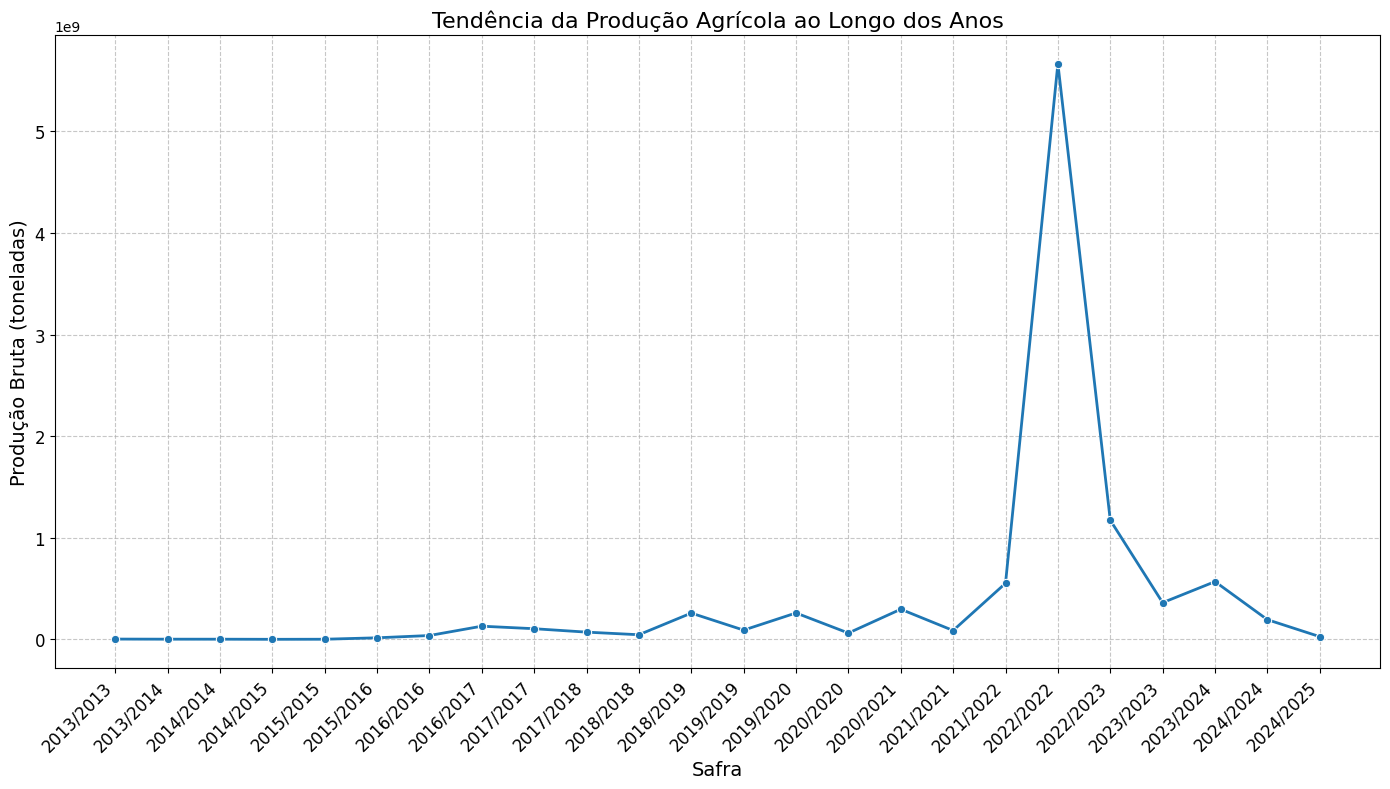

In [85]:
# Agrupar produção por safra
df_grouped = df.groupby('Safra')['Producao bruta'].sum().reset_index()

# Criar gráfico de linha para visualizar a tendência
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_grouped, x='Safra', y='Producao bruta', marker='o', linewidth=2)
plt.title('Tendência da Produção Agrícola ao Longo dos Anos', fontsize=16)
plt.xlabel('Safra', fontsize=14)
plt.ylabel('Produção Bruta (toneladas)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajustar o layout para evitar sobreposição
plt.show()

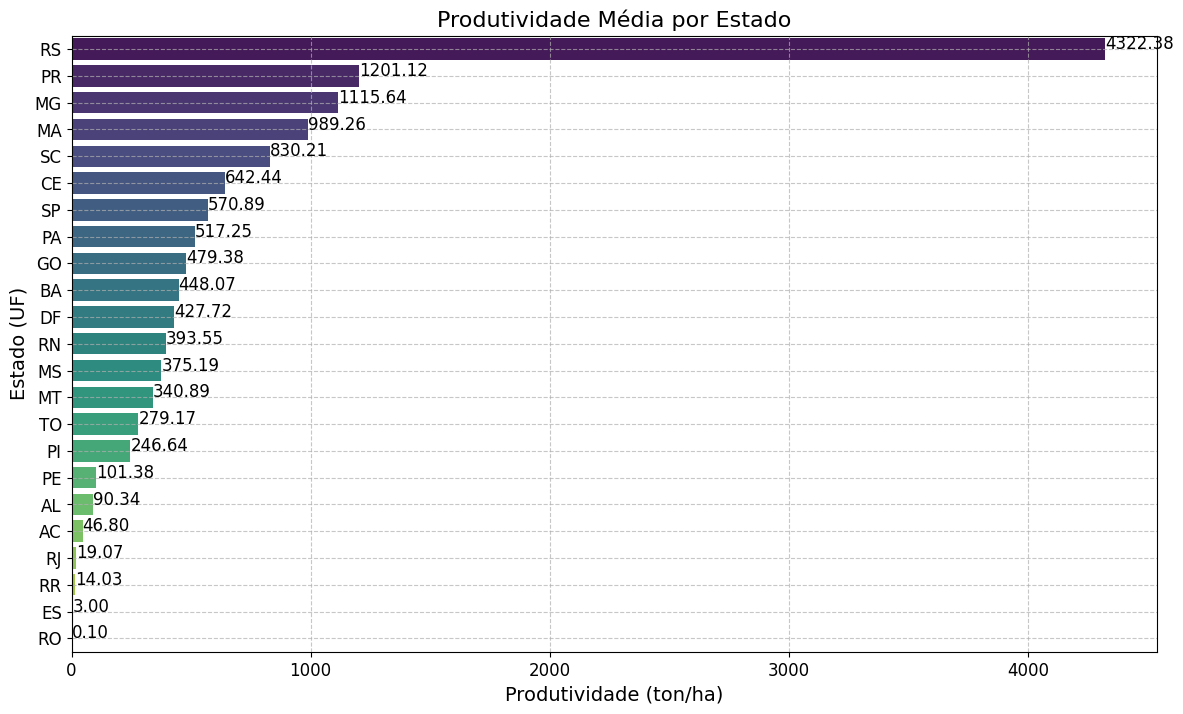

In [129]:
# Ordenar os estados pela produtividade média
df_estado = df_estado.sort_values(by='Produtividade', ascending=False)

# Criar gráfico de barras
plt.figure(figsize=(14, 8))
barplot = sns.barplot(data=df_estado, x='Produtividade', y='UF', hue='UF', palette='viridis')
plt.title('Produtividade Média por Estado', fontsize=16)
plt.xlabel('Produtividade (ton/ha)', fontsize=14)
plt.ylabel('Estado (UF)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Adicionar rótulos de valores nas barras
for index, value in enumerate(df_estado['Produtividade']):
    barplot.text(value, index, f'{value:.2f}', color='black', ha="left", fontsize=12)

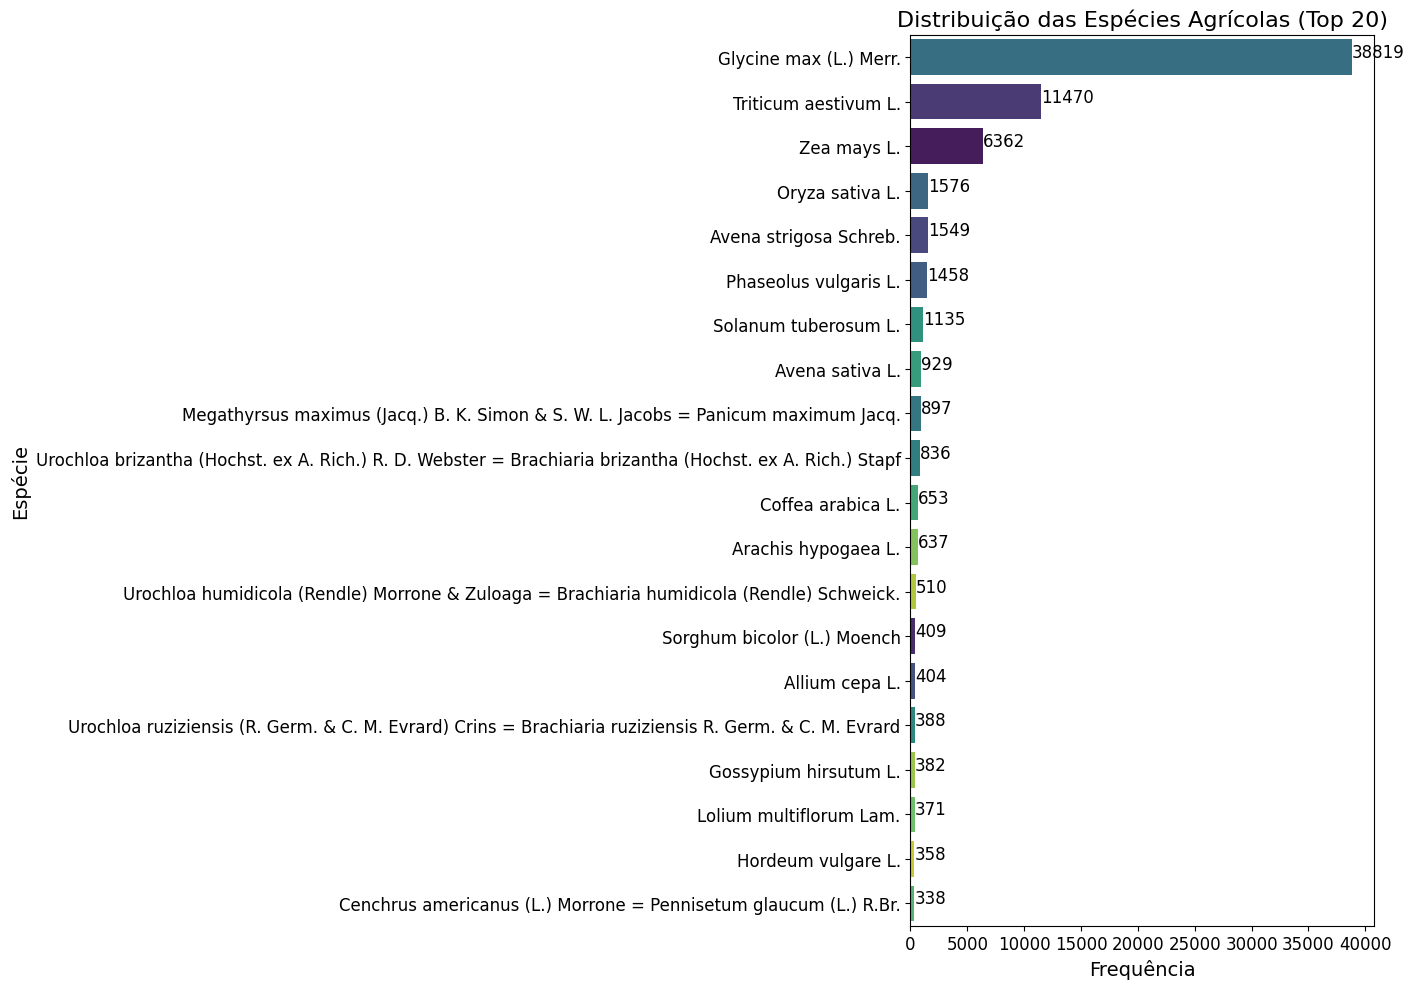

In [124]:
# Contagem de culturas
plt.figure(figsize=(14, 10))

# Limitar o número de espécies exibidas para as top 20 mais frequentes
top_n = 20
top_species = df['Especie'].value_counts().nlargest(top_n).index

sns.countplot(data=df[df['Especie'].isin(top_species)], y='Especie', hue= 'Especie', order=top_species, palette='viridis')
plt.title('Distribuição das Espécies Agrícolas (Top 20)', fontsize=16)
plt.xlabel('Frequência', fontsize=14)
plt.ylabel('Espécie', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adicionar rótulos de valores nas barras
for index, value in enumerate(df['Especie'].value_counts().nlargest(top_n)):
    plt.text(value, index, f'{value}', color='black', ha="left", fontsize=12)

plt.tight_layout()  # Ajustar o layout para evitar sobreposição
plt.show()

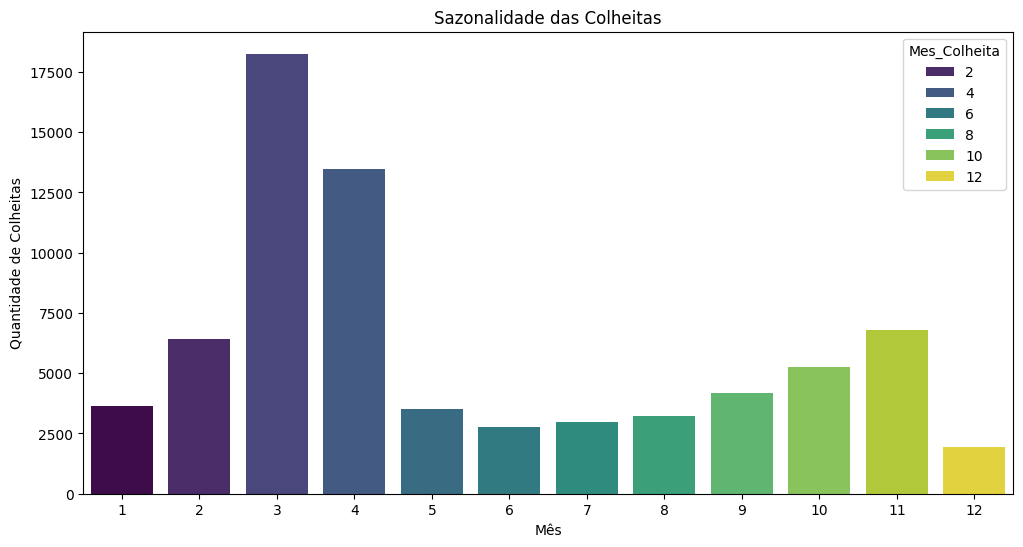

In [ ]:
# Extrair o mês da colheita
df['Mes_Colheita'] = df['Data de Colheita'].dt.month

# Criar gráfico de sazonalidade
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Mes_Colheita', hue='Mes_Colheita', palette='magma')
plt.title('Sazonalidade das Colheitas')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Colheitas')
plt.show()


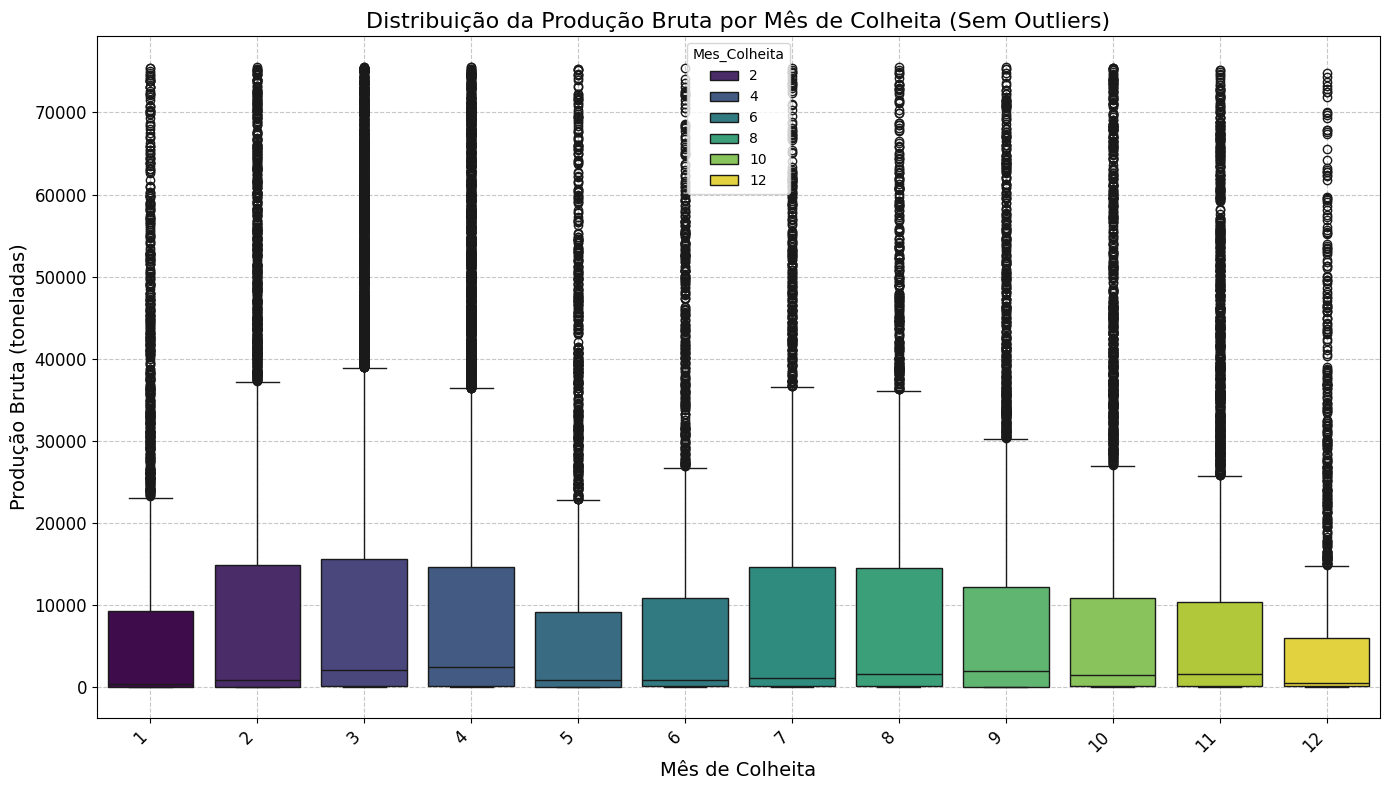

In [127]:
# Verificar se a coluna 'Mes_Colheita' existe no DataFrame
if 'Mes_Colheita' in df.columns and 'Producao bruta' in df.columns:
    # Remover outliers usando o método do intervalo interquartil (IQR)
    Q1 = df['Producao bruta'].quantile(0.25)
    Q3 = df['Producao bruta'].quantile(0.75)
    IQR = Q3 - Q1
    df_filtered = df[~((df['Producao bruta'] < (Q1 - 1.5 * IQR)) | (df['Producao bruta'] > (Q3 + 1.5 * IQR)))]

    # Criar gráfico de boxplot do mês da colheita
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df_filtered, x='Mes_Colheita', y='Producao bruta', hue='Mes_Colheita', palette='viridis')
    plt.title('Distribuição da Produção Bruta por Mês de Colheita (Sem Outliers)', fontsize=16)
    plt.xlabel('Mês de Colheita', fontsize=14)
    plt.ylabel('Produção Bruta (toneladas)', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()  # Ajustar o layout para evitar sobreposição
    plt.show()
else:
    print("Erro: O DataFrame não contém as colunas 'Mes_Colheita' e/ou 'Producao bruta'.")

1️⃣ Qual foi a produção total por safra e espécie?

In [115]:
# Criar conexão com SQLite
conn = sqlite3.connect(":memory:")  # Criando um banco de dados temporário na memória

# Salvar o dataframe como tabela SQL
df.to_sql("producao_sementes", conn, index=False, if_exists="replace")

query = """
SELECT Safra, Especie, SUM("Producao bruta") AS Total_Producao
FROM producao_sementes
GROUP BY Safra, Especie
ORDER BY Safra DESC, Total_Producao DESC;
"""

# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql

,Safra,Especie,Total_Producao
0,2024/2025,Zea mays L.,17142760.0
1,2024/2025,Glycine max (L.) Merr.,6706821.0
2,2024/2025,Phaseolus vulgaris L.,1910201.0
3,2024/2025,Oryza sativa L.,937757.0
4,2024/2025,Solanum tuberosum L.,98454.0
...,...,...,...
907,2013/2013,Triticum aestivum L.,32775.0
908,2013/2013,Phaseolus vulgaris L.,58.0
909,2013/2013,Sorghum bicolor (L.) Moench,52.0
910,2013/2013,Allium cepa L.,24.0


2️⃣ Quais as diferenças entre a produção bruta e a estimada?

In [120]:
query = """
SELECT Safra, Especie, SUM("Producao bruta") AS Produzido, SUM("Producao estimada") AS Estimado,
       (SUM("Producao bruta") - SUM("Producao estimada")) AS Diferenca
FROM producao_sementes
GROUP BY Safra, Especie
ORDER BY Safra DESC, Diferenca DESC;
"""

# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql

,Safra,Especie,Produzido,Estimado,Diferenca
0,2024/2025,Zea mays L.,17142760.0,79804,17062956.0
1,2024/2025,Glycine max (L.) Merr.,6706821.0,214176,6492645.0
2,2024/2025,Phaseolus vulgaris L.,1910201.0,23895,1886306.0
3,2024/2025,Oryza sativa L.,937757.0,2041,935716.0
4,2024/2025,Solanum tuberosum L.,98454.0,2843,95611.0
...,...,...,...,...,...
907,2013/2013,Triticum aestivum L.,32775.0,528,32247.0
908,2013/2013,Phaseolus vulgaris L.,58.0,10,48.0
909,2013/2013,Sorghum bicolor (L.) Moench,52.0,44,8.0
910,2013/2013,Solanum lycopersicum L. = Lycopersicon esculen...,13.0,6,7.0


3️⃣ Quais estados tem maior produtividade agrícola?

In [121]:
query = """
SELECT UF, SUM("Producao bruta") / SUM(Area) AS Produtividade_Media
FROM producao_sementes
GROUP BY UF
ORDER BY Produtividade_Media DESC;
"""
# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql

,UF,Produtividade_Media
0,RS,2428.081528
1,PR,762.896630
2,CE,676.065663
3,PA,410.594522
4,SC,263.260844
5,DF,197.878837
6,RN,143.501626
7,MG,127.445865
8,MA,119.685024
9,PI,117.425749


4️⃣ Quais safras tiveram maior crescimento na produção?

In [122]:
query = """
SELECT Safra, SUM("Producao bruta") AS Total_Producao,
       (SUM("Producao bruta") - LAG(SUM("Producao bruta")) OVER (ORDER BY Safra)) / 
       NULLIF(LAG(SUM("Producao bruta")) OVER (ORDER BY Safra), 0) * 100 AS Crescimento_Percentual
FROM producao_sementes
GROUP BY Safra
ORDER BY Safra DESC;
"""
# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql

,Safra,Total_Producao,Crescimento_Percentual
0,2024/2025,2.682706e+07,-86.158143
1,2024/2024,1.938111e+08,-65.906721
2,2023/2024,5.684731e+08,57.340715
3,2023/2023,3.613007e+08,-69.202335
4,2022/2023,1.173143e+09,-79.297349
5,2022/2022,5.666633e+09,926.401980
6,2021/2022,5.520871e+08,532.932952
7,2021/2021,8.722679e+07,-70.593049
8,2020/2021,2.966196e+08,377.419088
9,2020/2020,6.212982e+07,-76.091857


5️⃣ Como se deu a evolução da produtividade ao longo dos anos?

In [123]:
query = """
SELECT Safra, AVG(Produtividade) AS Media_Produtividade
FROM producao_sementes
GROUP BY Safra
ORDER BY Safra DESC;
"""
# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql

,Safra,Media_Produtividade
0,2024/2025,1125.561313
1,2024/2024,691.315264
2,2023/2024,733.438377
3,2023/2023,947.268076
4,2022/2023,940.082542
5,2022/2022,16461.459453
6,2021/2022,1088.829791
7,2021/2021,655.736760
8,2020/2021,697.899818
9,2020/2020,551.728595


6️⃣ Quais os municípios com maior produção de sementes?

In [130]:
query = """
SELECT Municipio, UF, SUM("Producao bruta") AS Total_Producao
FROM producao_sementes
GROUP BY Municipio, UF
ORDER BY Total_Producao DESC;
"""

# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql

,Municipio,UF,Total_Producao
0,Palmeira das Missões,RS,5.607440e+09
1,Tibagi,PR,6.058237e+08
2,Coromandel,MG,2.022536e+08
3,Campos Novos,SC,1.356206e+08
4,Rio Verde,GO,9.322958e+07
...,...,...,...
1416,São João da Urtiga,RS,0.000000e+00
1417,Taguaí,SP,0.000000e+00
1418,Tavares,RS,0.000000e+00
1419,Tomé-Açu,PA,0.000000e+00


7️⃣Quais os municípios com melhor produtividade agrícola?

In [132]:
# Consulta SQL corrigida
query = """
SELECT Municipio, UF, AVG(Produtividade) AS Media_Produtividade
FROM producao_sementes
GROUP BY Municipio, UF
ORDER BY Media_Produtividade DESC;

"""

# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql

,Municipio,UF,Media_Produtividade
0,Pedro Osório,RS,145560.544733
1,Palmeira das Missões,RS,98996.232368
2,Lassance,MG,92412.981299
3,São Miguel Arcanjo,SP,36947.510760
4,Itabera,SP,23132.843829
...,...,...,...
1416,São João da Urtiga,RS,0.000000
1417,Taguaí,SP,0.000000
1418,Tavares,RS,0.000000
1419,Tomé-Açu,PA,0.000000


8️⃣ Tempo médio entre plantio e colheita por espécie?

In [133]:
# Consulta SQL corrigida
query = """
SELECT Especie, AVG("Data de Colheita" - "Data do Plantio") AS Tempo_Medio_Dias
FROM producao_sementes
GROUP BY Especie
ORDER BY Tempo_Medio_Dias DESC;
"""

# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql

,Especie,Tempo_Medio_Dias
0,Musa velutina H.Wendl. & Drude,21.000000
1,Musa ensete Gmel.,21.000000
2,Monstera deliciosa Liebm,21.000000
3,Coffea arabica var. nana Linneu,20.500000
4,Ardisia crispa (Thunb.) A. DC.,20.500000
...,...,...
158,Brassica juncea (L.) Czern.,0.000000
159,Avena brevis Roth,0.000000
160,Crotalaria spectabilis Roth,-0.007634
161,Avena sativa L.,-0.022605


9️⃣ Estados que mais aumentaram a produção nos últimos 5 anos

In [135]:
# Consulta SQL corrigida
query = """
WITH producao_por_ano AS (
    SELECT UF, Safra, SUM("Producao bruta") AS Total_Producao
    FROM producao_sementes
    GROUP BY UF, Safra
),
producao_ultimos_5_anos AS (
    SELECT UF, Safra, Total_Producao,
           LAG(Total_Producao, 1) OVER (PARTITION BY UF ORDER BY Safra) AS Producao_Ano_Anterior,
           LAG(Total_Producao, 5) OVER (PARTITION BY UF ORDER BY Safra) AS Producao_5_Anos_Atras
    FROM producao_por_ano
)
SELECT UF, Safra, Total_Producao,
       (Total_Producao - Producao_5_Anos_Atras) AS Aumento_Producao_5_Anos
FROM producao_ultimos_5_anos
WHERE Safra >= (SELECT MAX(Safra) - 4 FROM producao_sementes)
ORDER BY Aumento_Producao_5_Anos DESC
LIMIT 10;
"""

# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql

,UF,Safra,Total_Producao,Aumento_Producao_5_Anos
0,RS,2022/2022,5.609668e+09,5.589676e+09
1,PR,2022/2023,7.212250e+08,6.949179e+08
2,MG,2021/2022,2.133862e+08,1.971467e+08
3,MG,2023/2023,1.644621e+08,1.506259e+08
4,GO,2023/2024,1.220652e+08,1.165726e+08
5,RS,2022/2023,1.260348e+08,1.136323e+08
6,PR,2023/2024,1.110577e+08,8.640505e+07
7,GO,2022/2023,8.144245e+07,7.487984e+07
8,MT,2022/2023,7.355968e+07,7.218137e+07
9,MT,2023/2024,7.259787e+07,7.078766e+07


🔟 Tempo médio entre plantio e colheita por categoria de cultura.

In [143]:
# Garantir que as colunas de data estejam no formato datetime
df['Data de Colheita'] = pd.to_datetime(df['Data de Colheita'], errors='coerce')
df['Data do Plantio'] = pd.to_datetime(df['Data do Plantio'], errors='coerce')

# Consulta SQL corrigida
query = """
SELECT Categoria, AVG(JULIANDAY("Data de Colheita") - JULIANDAY("Data do Plantio")) AS Tempo_Medio
FROM producao_sementes
GROUP BY Categoria
ORDER BY Tempo_Medio DESC;
"""

# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql

,Categoria,Tempo_Medio
0,None,7038.000000
1,S2,333.588830
2,S1,265.357152
3,C2,214.845906
4,C1,176.714544
5,Genética,145.549865
6,Básica,133.770294


Ranking das espécies mais resilientes à variação de produtividade.

In [147]:
# Consulta SQL Ranking das espécies mais resilientes à variação de produtividade
query = """
WITH produtividade_por_safra AS (
    SELECT Safra, Especie, AVG(Produtividade) AS Media_Produtividade
    FROM producao_sementes
    GROUP BY Safra, Especie
),
variacao_produtividade AS (
    SELECT Especie, MAX(Media_Produtividade) - MIN(Media_Produtividade) AS Variacao_Produtividade
    FROM produtividade_por_safra
    GROUP BY Especie
)
SELECT Especie, Variacao_Produtividade
FROM variacao_produtividade
ORDER BY Variacao_Produtividade ASC;
"""

# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql

,Especie,Variacao_Produtividade
0,Acrocomia aculeata (Jacq.) Lodd. ex Mart.,0.000000
1,Allium fistulosum L.,0.000000
2,Allium porrum L.,0.000000
3,Allium schoenoprasum L.,0.000000
4,Apium graveolens L.,0.000000
...,...,...
158,Phaseolus vulgaris L.,7812.967068
159,Hordeum vulgare L.,18497.452072
160,Sorghum bicolor (L.) Moench,21008.509445
161,Triticum aestivum L.,36101.310697


Identificação de períodos ideais para o plantio de cada espécie.

In [151]:
# Consulta SQL Identificação de períodos ideais para o plantio de cada espécie
query = """
SELECT Especie, strftime('%m-%d', AVG(julianday("Data do Plantio"))) AS Data_Media_Plantio
FROM producao_sementes
GROUP BY Especie
ORDER BY Data_Media_Plantio;
    """
# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql

,Especie,Data_Media_Plantio
0,Acrocomia aculeata (Jacq.) Lodd. ex Mart.,01-01
1,Philodendron martianum Engl.,01-03
2,Urochloa ruziziensis (R. Germ. & C. M. Evrard)...,01-04
3,Cicer arietinum L.,01-06
4,Hordeum vulgare L. subsp. vulgare,01-07
...,...,...
158,Urochloa decumbens (Stapf) R. D. Webster = Bra...,12-13
159,Crotalaria spectabilis Roth,12-15
160,Setaria sphacelata (Schumach.) Stapf & C. E. H...,12-17
161,Solanum melongena L.,12-18


Impacto da categoria da cultura na produtividade média

In [154]:
# Consulta SQL para Impacto da categoria da cultura na produtividade média
query = """
SELECT Categoria, AVG(Produtividade) AS Media_Produtividade
FROM producao_sementes
GROUP BY Categoria
ORDER BY Media_Produtividade DESC;
"""

# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql

,Categoria,Media_Produtividade
0,C2,5960.901883
1,S1,876.104629
2,C1,856.332482
3,Básica,626.262206
4,S2,573.830829
5,Genética,281.653885
6,None,2.000000


Comparação entre safras com base na eficiência produtiva.

In [159]:

# Consulta SQl para Comparação entre safras com base na eficiência de produção
query = """ 
SELECT Safra, AVG(Produtividade) AS Media_Produtividade
FROM producao_sementes 
GROUP BY Safra 
    """
# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql

,Safra,Media_Produtividade
0,2013/2013,413.094409
1,2013/2014,353.459242
2,2014/2014,382.449008
3,2014/2015,264.235789
4,2015/2015,729.005026
5,2015/2016,5382.385477
6,2016/2016,2032.661851
7,2016/2017,1175.557710
8,2017/2017,1822.270370
9,2017/2018,754.614387


Cultura dominante em cada estado.

In [162]:
# Consulta SQL para Cultura dominante em cada estado
query = """
SELECT UF, Especie, COUNT(Especie) AS Total_Culturas
FROM producao_sementes
GROUP BY UF, Especie
ORDER BY Total_Culturas DESC;
"""

# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)
                           
# Exibir o DataFrame resultante
df_sql

,UF,Especie,Total_Culturas
0,PR,Glycine max (L.) Merr.,9071
1,RS,Glycine max (L.) Merr.,7548
2,SC,Glycine max (L.) Merr.,7205
3,PR,Triticum aestivum L.,5238
4,RS,Triticum aestivum L.,4543
...,...,...,...
456,SP,Solanum aethiopicum L. = Solanum gilo Raddi,1
457,TO,Andropogon gayanus Kunth,1
458,TO,Cenchrus americanus (L.) Morrone = Pennisetum ...,1
459,TO,Stylosanthes macrocephala M. B. Ferreira & Sou...,1


Identificação de municípios com maior diversidade de culturas

In [163]:
# Consulta SQL para Identificação de municípios com maior diversidade de culturas
query = """
SELECT Municipio, COUNT(DISTINCT Especie) AS Total_Culturas
FROM producao_sementes
GROUP BY Municipio
ORDER BY Total_Culturas DESC;
"""

# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn) 

# Exibir o DataFrame resultante
df_sql

,Municipio,Total_Culturas
0,Candiota,44
1,Jaíba,23
2,Matias Cardoso,21
3,Nova Porteirinha,19
4,Hulha Negra,18
...,...,...
1399,Alcinópolis,1
1400,Agudo,1
1401,Agrolândia,1
1402,Abadiânia,1


Diferença entre a produção planejada e a real por safra

In [165]:
#Consulta SQL para diferença entre a produção planejada e a produção real por safra
query = """
SELECT Safra, SUM("Producao bruta") AS Producao_Real, SUM("Producao estimada") AS Producao_Planejada,
       SUM("Producao bruta") - SUM("Producao estimada") AS Diferenca
       FROM producao_sementes
GROUP BY Safra
ORDER BY Safra DESC;
"""

# Executar a consulta SQL e carregar os resultados em um DataFrame
df_sql = pd.read_sql_query(query, conn)

# Exibir o DataFrame resultante
df_sql

,Safra,Producao_Real,Producao_Planejada,Diferenca
0,2024/2025,2.682706e+07,328199,2.649886e+07
1,2024/2024,1.938111e+08,14784259,1.790269e+08
2,2023/2024,5.684731e+08,34485092,5.339880e+08
3,2023/2023,3.613007e+08,22775702,3.385250e+08
4,2022/2023,1.173143e+09,37144693,1.135998e+09
5,2022/2022,5.666633e+09,8806568,5.657826e+09
6,2021/2022,5.520871e+08,48889929,5.031971e+08
7,2021/2021,8.722679e+07,4332908,8.289388e+07
8,2020/2021,2.966196e+08,205248342,9.137127e+07
9,2020/2020,6.212982e+07,7530278,5.459954e+07
